# Name: D. M. Khalid Mahmud

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

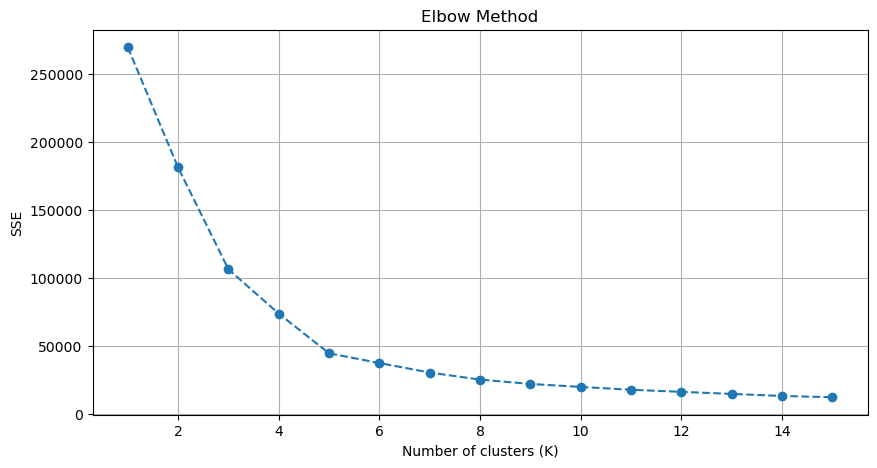

In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")  # Replace with the actual file path

# Selecting relevant features for clustering
X = data.iloc[:, [3, 4]].values  # Annual Income and Spending Score

# Initialize a list to store SSE values for different K
sse = []

# Try different values of K from 1 to 15
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # Inertia: sum of squared distances to the nearest cluster center

# Plot the Elbow Method graph to find the optimal K
plt.figure(figsize=(10, 5))
plt.plot(range(1, 16), sse, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.grid()
plt.show()


C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


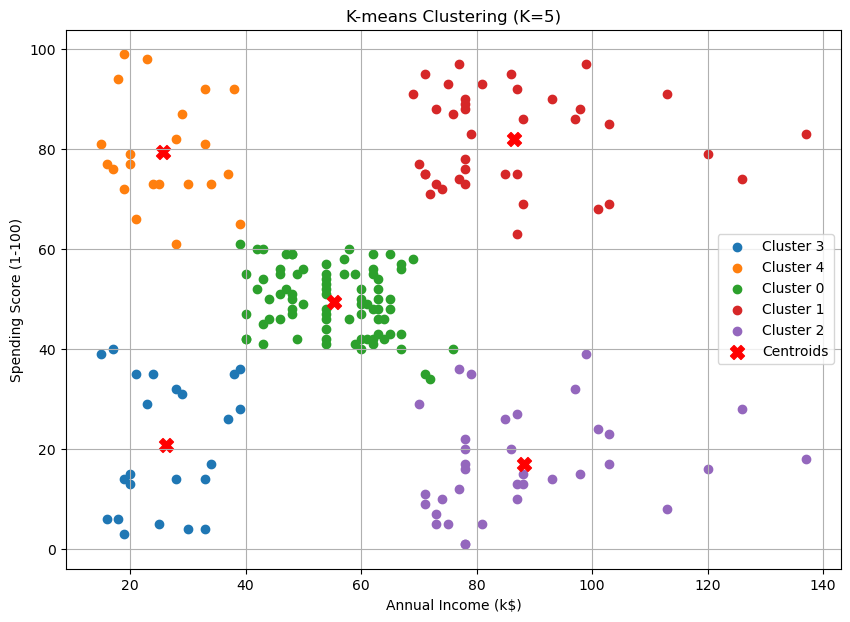

In [4]:
# Perform K-means clustering with the optimal K
optimal_k = 5  # Replace with the chosen K from the elbow method

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Create a list of unique cluster labels
clusters = data['Cluster'].unique()

# Plot each cluster
plt.figure(figsize=(10, 7))
for cluster in clusters:
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income (k$)'],
                data[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='red', label='Centroids', marker='X')

plt.title(f'K-means Clustering (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()
